# Environmental Indicators for Different Sites


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Configuration
INPUT_DIR = "../../data/processed/sites/df1/"

# Load all section data using a for loop
section_data = {}
for i in range(0, 7):
    section_name = f"section_{i}"
    file_path = os.path.join(INPUT_DIR, f"{section_name}.csv")
    section_data[section_name] = pd.read_csv(file_path)

# Print the first few rows of each section to verify loading
for section_name, df in section_data.items():
    print(f"Data for {section_name}:")
    print(df.head(), "\n")


Data for section_0:
              Stios Indicador    Enero  Febrero    Marzo    Abril     Total
0              TSAN      Kw/h  54850.0  59992.0  48422.0  58710.0  221974.0
1               GLP       NaN  38136.0  41690.0  33650.0  40797.0  154273.0
2          AVIACION       NaN  15178.0   6500.0   8244.0   6612.0   36534.0
3          ULTRAPAR       NaN  11826.0  12064.0  10368.0  10376.0   44634.0
4  Retail COCO/CODO       NaN   6819.0   6423.0   6671.0   7300.0   27213.0 

Data for section_1:
      Stios                             Indicador     Enero  Febrero  Marzo  \
0      TSAN  Residuos SOLIDOS Peligrosos Solidos   193360.0   1180.0  740.0   
1       GLP  Residuos SOLIDOS Peligrosos Solidos   193360.0    740.0  740.0   
2  AVIACION  Residuos SOLIDOS Peligrosos Solidos   193360.0    960.0  740.0   
3  ULTRAPAR  Residuos SOLIDOS Peligrosos Solidos   193360.0    960.0  740.0   
4   FLUVIAL  Residuos SOLIDOS Peligrosos Solidos   193360.0    960.0  740.0   

   Abril     Total  
0  630

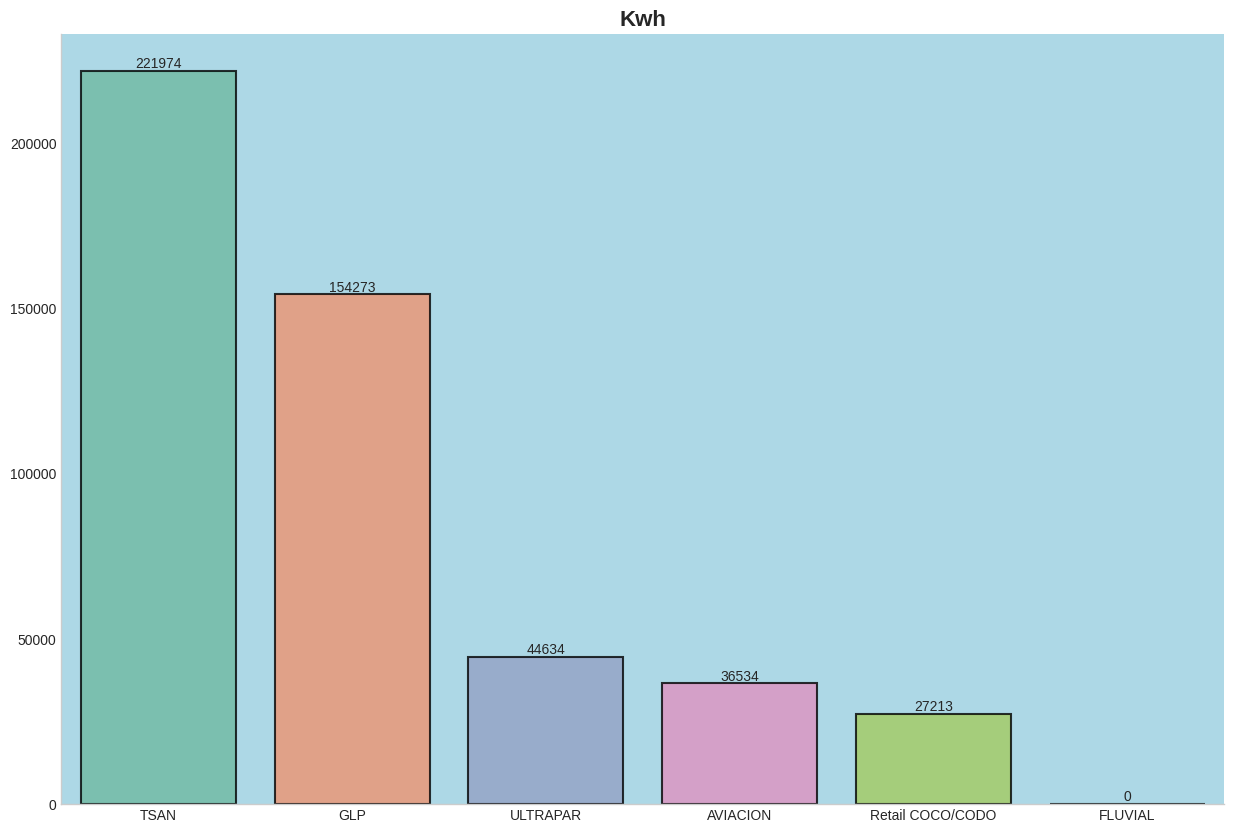

In [65]:
# Plotting the data
# Sort in descending order by 'Total' for section_0
section_data["section_0"].sort_values(
    by="Total", ascending=False, inplace=True
)

sns.color_palette("Set2")

# Plotting the bar plot for section_0
ax = sns.barplot(
    section_data["section_0"],
    x="Stios",
    y="Total",
    hue="Stios",
    errorbar=None,
    palette="Set2",
    orient="v",
    dodge=False,
    edgecolor="black",
    linewidth=1.5,
    saturation=0.8,
    alpha=0.8,
)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Set the title and labels
ax.set_title("Kwh", fontsize=16, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_facecolor("lightblue")
plt.grid(axis="y", linestyle="", alpha=0.7)

plt.show()


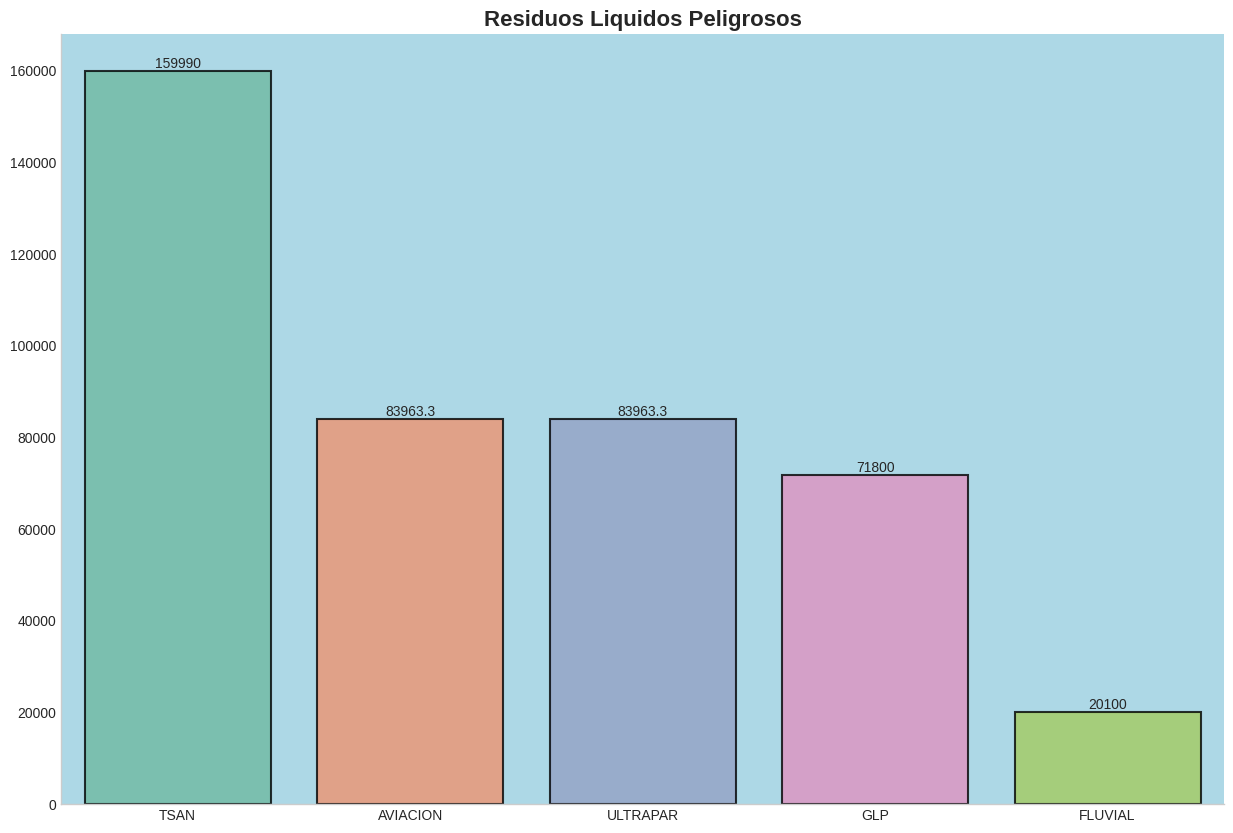

In [63]:
# Plotting the bar plot for section_2

section_data["section_2"].sort_values(
    by="Total", ascending=False, inplace=True
)

ax = sns.barplot(
    section_data["section_2"],
    x="Stios",
    y="Total",
    hue="Stios",
    errorbar=None,
    palette="Set2",
    orient="v",
    dodge=False,
    edgecolor="black",
    linewidth=1.5,
    saturation=0.8,
    alpha=0.8,
)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Set the title and labels
ax.set_title("Residuos Liquidos Peligrosos", fontsize=16, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_facecolor("lightblue")
plt.grid(axis="y", linestyle="", alpha=0.7)

plt.show()


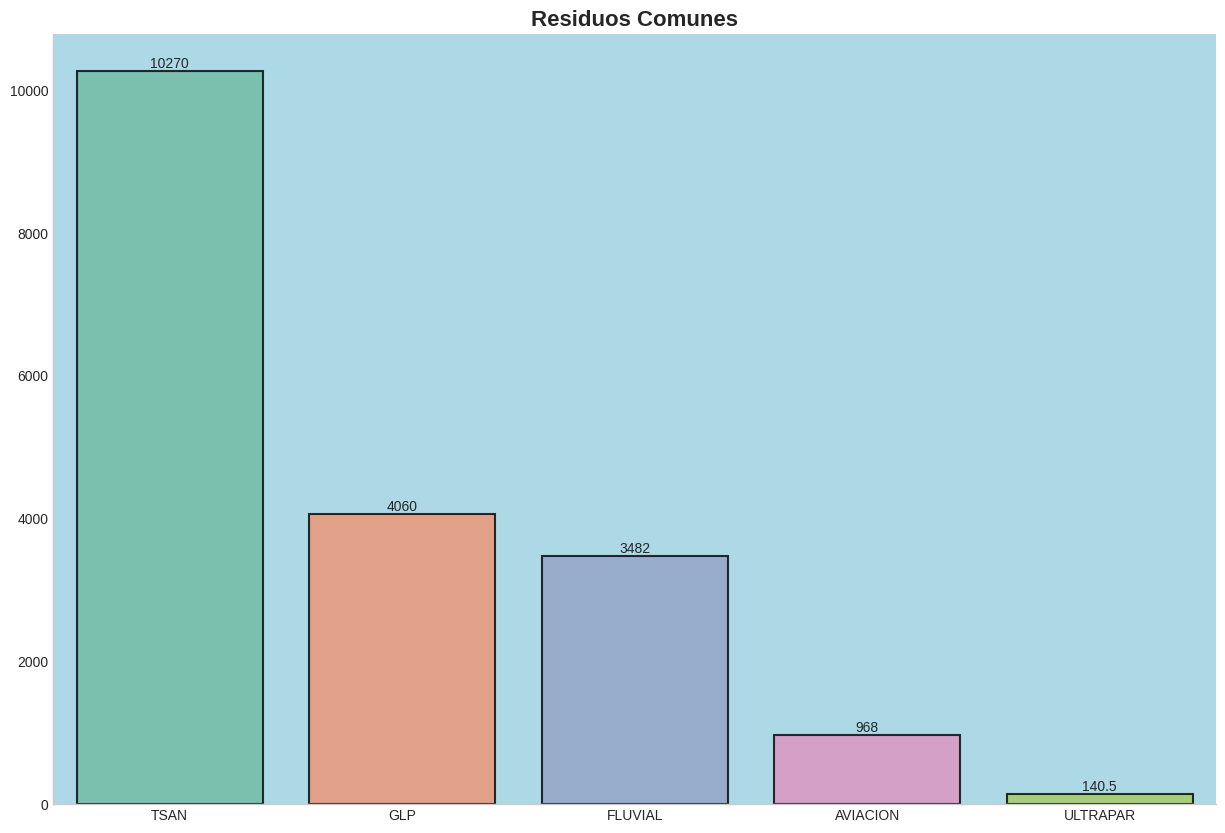

In [64]:
# Plotting the bar plot for section_3

section_data["section_3"].sort_values(
    by="Total", ascending=False, inplace=True
)

ax = sns.barplot(
    section_data["section_3"],
    x="Stios",
    y="Total",
    hue="Stios",
    errorbar=None,
    palette="Set2",
    orient="v",
    dodge=False,
    edgecolor="black",
    linewidth=1.5,
    saturation=0.8,
    alpha=0.8,
)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Set the title and labels
ax.set_title("Residuos Comunes", fontsize=16, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_facecolor("lightblue")
plt.grid(axis="y", linestyle="", alpha=0.7)

plt.show()


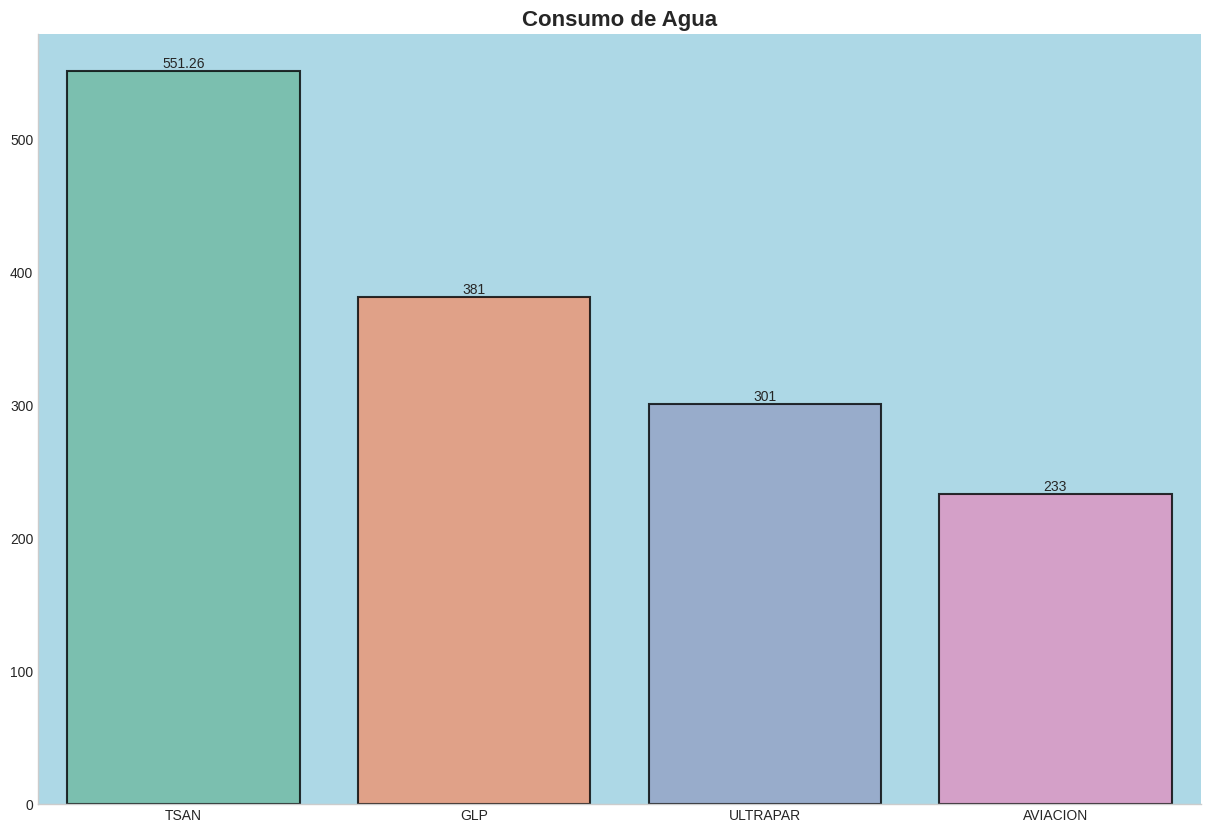

In [66]:
# Plotting the bar plot for section_4

section_data["section_4"].sort_values(
    by="Total", ascending=False, inplace=True
)

ax = sns.barplot(
    section_data["section_4"],
    x="Stios",
    y="Total",
    hue="Stios",
    errorbar=None,
    palette="Set2",
    orient="v",
    dodge=False,
    edgecolor="black",
    linewidth=1.5,
    saturation=0.8,
    alpha=0.8,
)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Set the title and labels
ax.set_title("Consumo de Agua", fontsize=16, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_facecolor("lightblue")
plt.grid(axis="y", linestyle="", alpha=0.7)

plt.show()


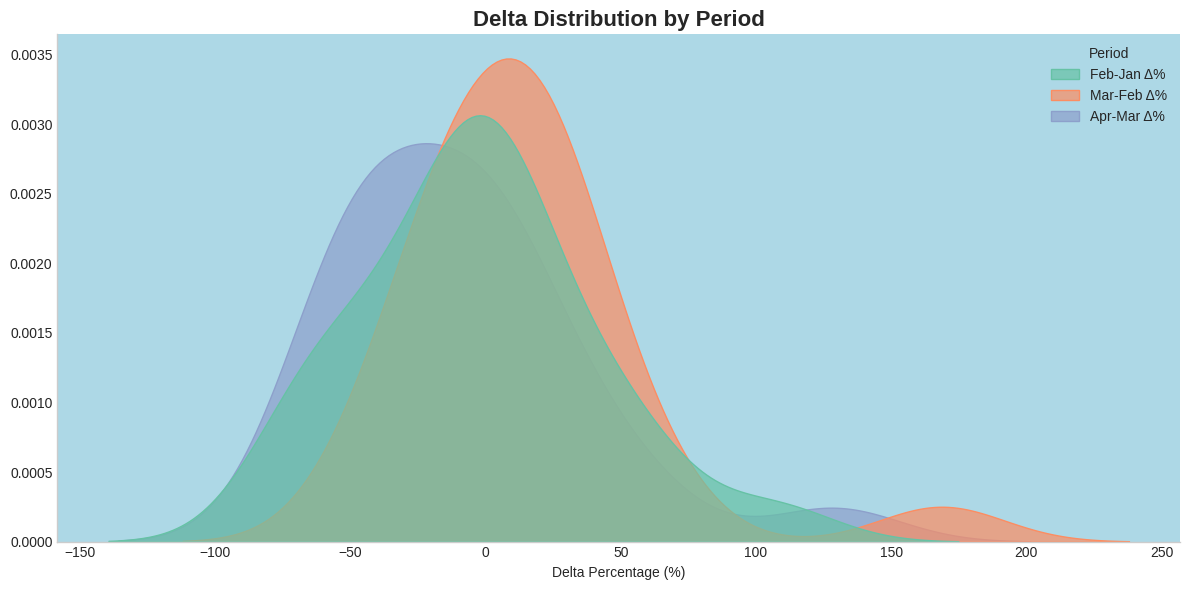

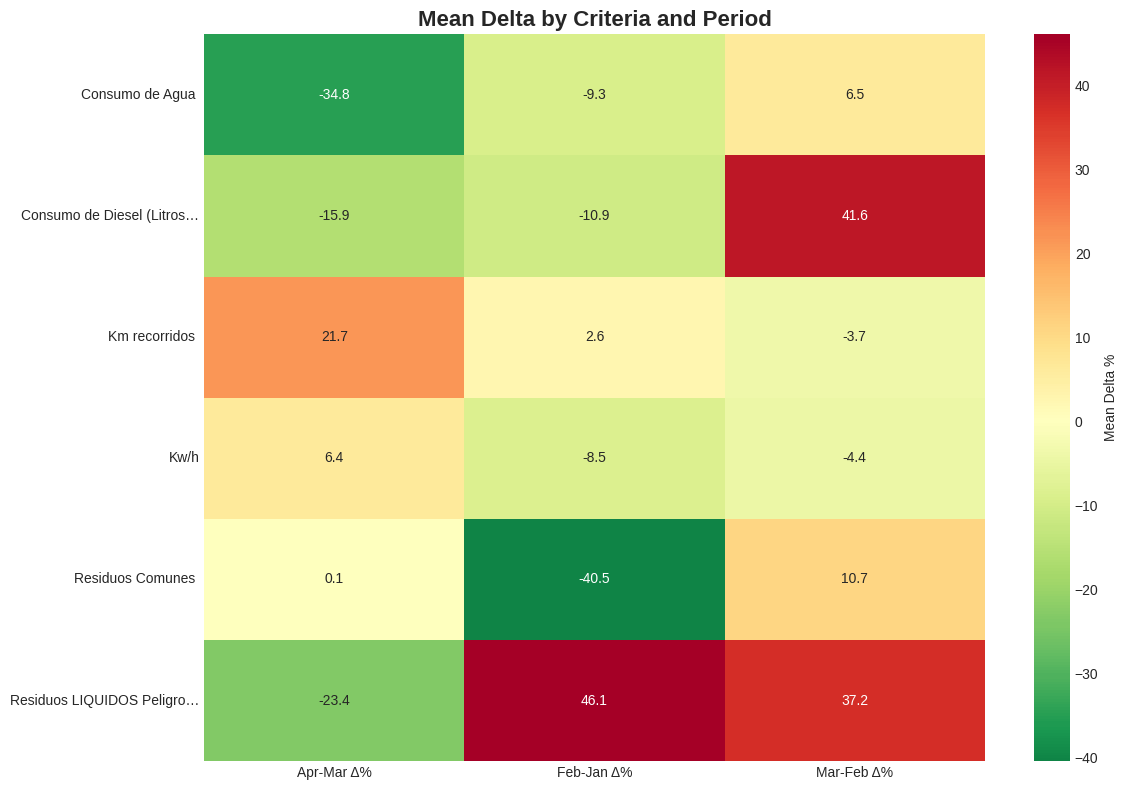

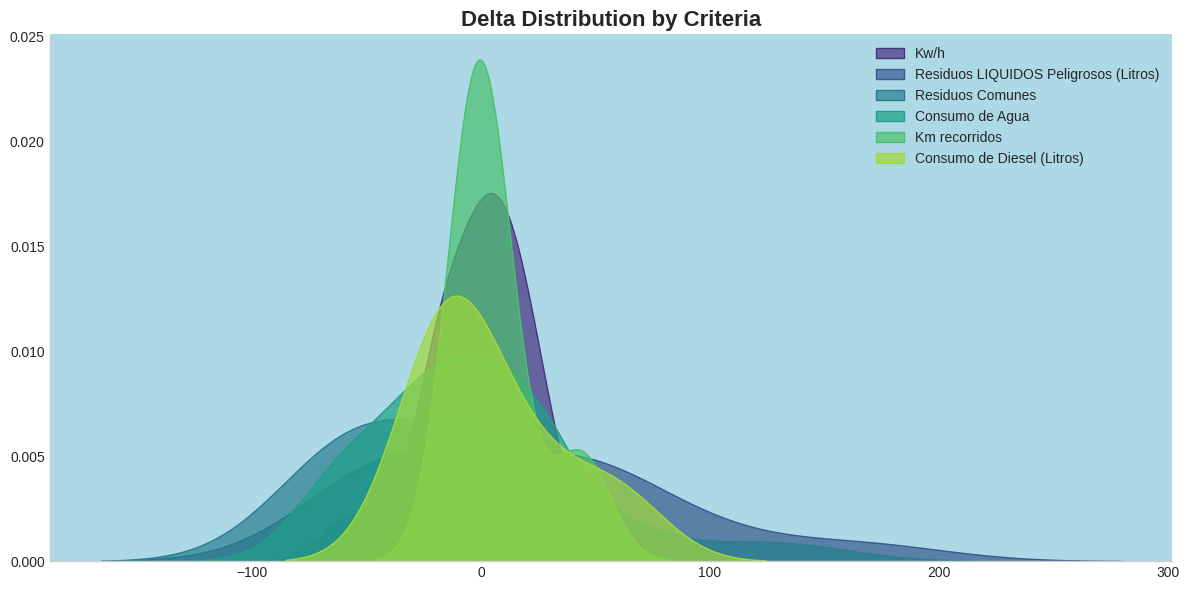

In [110]:
from IPython.display import display, HTML


def create_delta_variation_table():
    """Create a table showing delta variations for each site across months and criteria."""

    # Sections to analyze
    sections_to_analyze = [
        "section_0",
        "section_2",
        "section_3",
        "section_4",
        "section_5",
        "section_6",
    ]

    # Collect all data
    all_delta_data = []
    month_cols = ["Enero", "Febrero", "Marzo", "Abril"]

    for section_name in sections_to_analyze:
        df = section_data[section_name]

        # Get section title
        if "Indicador" in df.columns:
            indicador_values = df["Indicador"].dropna()
            criteria = (
                indicador_values.iloc[0]
                if len(indicador_values) > 0
                else section_name
            )
        else:
            criteria = section_name

        # Process each site in this section
        for _, row in df.iterrows():
            if pd.isna(row["Stios"]):
                continue

            site = row["Stios"]
            monthly_values = []

            # Extract monthly values
            for month in month_cols:
                if month in row and pd.notna(row[month]):
                    monthly_values.append(float(row[month]))
                else:
                    monthly_values.append(np.nan)

            # Calculate deltas only if we have at least 2 values
            valid_values = [v for v in monthly_values if not pd.isna(v)]
            if len(valid_values) >= 2:
                deltas = []

                # Calculate month-to-month deltas
                for i in range(1, len(monthly_values)):
                    if not pd.isna(monthly_values[i - 1]) and not pd.isna(
                        monthly_values[i]
                    ):
                        delta = monthly_values[i] - monthly_values[i - 1]
                        delta_pct = (
                            (delta / monthly_values[i - 1] * 100)
                            if monthly_values[i - 1] != 0
                            else 0
                        )
                        deltas.append(delta_pct)
                    else:
                        deltas.append(np.nan)

                # Calculate mean delta for this site-criteria combination
                valid_deltas = [d for d in deltas if not pd.isna(d)]
                mean_delta = np.mean(valid_deltas) if valid_deltas else np.nan

                # Store the data
                row_data = {
                    "Site": site,
                    "Criteria": criteria,
                    "Feb-Jan Δ%": deltas[0] if len(deltas) > 0 else np.nan,
                    "Mar-Feb Δ%": deltas[1] if len(deltas) > 1 else np.nan,
                    "Apr-Mar Δ%": deltas[2] if len(deltas) > 2 else np.nan,
                    "Mean Δ%": mean_delta,
                }

                all_delta_data.append(row_data)

    # Create DataFrame
    delta_df = pd.DataFrame(all_delta_data)

    if delta_df.empty:
        display(HTML("<h3>No delta data available to display</h3>"))
        return

    # Create seaborn visualization for delta variations
    _create_delta_seaborn_plots(delta_df)


def _create_delta_seaborn_plots(delta_df: pd.DataFrame) -> None:
    """Create seaborn visualizations for delta variations."""

    # Prepare data for plotting
    delta_melted = delta_df.melt(
        id_vars=["Site", "Criteria"],
        value_vars=["Feb-Jan Δ%", "Mar-Feb Δ%", "Apr-Mar Δ%"],
        var_name="Period",
        value_name="Delta_Percentage",
    ).dropna()

    if delta_melted.empty:
        print("No delta data for visualization")
        return

    # Chart 1: Distribution of all delta values by period
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=delta_melted,
        x="Delta_Percentage",
        hue="Period",
        alpha=0.7,
        fill=True,
        palette="Set2",
    )
    ax.grid(True, linestyle="", alpha=0.5)
    ax.set_facecolor("lightblue")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.title("Delta Distribution by Period", fontsize=16, fontweight="bold")
    plt.xlabel("Delta Percentage (%)")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # Chart 2: Heatmap of mean deltas by criteria and period
    pivot_data = (
        delta_melted.groupby(["Criteria", "Period"])["Delta_Percentage"]
        .mean()
        .unstack()
    )
    if not pivot_data.empty:
        plt.figure(figsize=(12, 8))
        # Truncate long y-tick labels (criteria)
        max_label_len = 25
        truncated_labels = [
            label
            if len(str(label)) <= max_label_len
            else str(label)[:max_label_len] + "…"
            for label in pivot_data.index
        ]
        ax = sns.heatmap(
            pivot_data,
            annot=True,
            fmt=".1f",
            cmap="RdYlGn_r",
            center=0,
            cbar_kws={"label": "Mean Delta %"},
        )
        ax.set_yticklabels(truncated_labels, rotation=0)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        plt.title(
            "Mean Delta by Criteria and Period", fontsize=16, fontweight="bold"
        )

        plt.xlabel("")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()

    # Chart 3: Density plot by criteria or overall KDE
    plt.figure(figsize=(12, 6))
    unique_criteria = delta_melted["Criteria"].unique()
    if len(unique_criteria) <= 6:
        for criteria in unique_criteria:
            criteria_data = delta_melted[delta_melted["Criteria"] == criteria][
                "Delta_Percentage"
            ]
            if len(criteria_data) > 1:
                ax = sns.kdeplot(
                    data=criteria_data,
                    label=criteria,
                    alpha=0.7,
                    fill=True,
                )
                ax.grid(True, linestyle="", alpha=0.5)
                ax.set_facecolor("lightblue")
                ax.spines["top"].set_visible(False)
                ax.spines["right"].set_visible(False)

        plt.title(
            "Delta Distribution by Criteria", fontsize=16, fontweight="bold"
        )
        plt.xlabel("")
        plt.ylabel("")
        plt.legend()
    else:
        # Overall KDE if too many criteria
        sns.kdeplot(
            data=delta_melted["Delta_Percentage"],
            fill=True,
            alpha=0.7,
        )
        plt.title(
            "Overall Delta Distribution (KDE)", fontsize=16, fontweight="bold"
        )
        plt.xlabel("Delta Percentage (%)")
        plt.axvline(0, color="red", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


# Generate the delta variation table and visualizations
delta_results = create_delta_variation_table()
